In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data',index_col=1)

In [4]:
df.head(2)

,Unnamed: 0,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,,
0.913917,0,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
scaled_features

array([[-1.73031962,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
df.columns

Index(['Unnamed: 0', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE',
       'NXJ', 'TARGET CLASS'],
      dtype='object')

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_feat.head(2)

,Unnamed: 0,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_feat
y= df['TARGET CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
prediction = knn.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print (confusion_matrix(y_test,prediction))
print (classification_report(y_test,prediction))

[[141  18]
 [ 14 127]]
             precision    recall  f1-score   support

          0       0.91      0.89      0.90       159
          1       0.88      0.90      0.89       141

avg / total       0.89      0.89      0.89       300



In [27]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

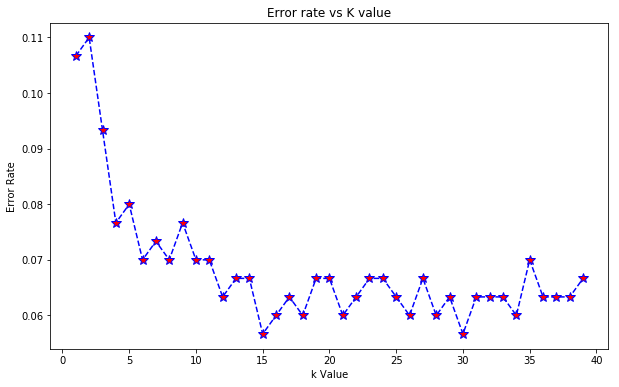

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[151   8]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.95      0.95       159
          1       0.94      0.94      0.94       141

avg / total       0.94      0.94      0.94       300

